# Sales Analysis

Our given data set encompasses the 2018 raw monthly sales data of an electronic store. There are approximately 200,000 sales split throughout 12 excel files. Variables are: {Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address}.

The goal of this analysis is to answer:
1. What was the best month for sales? How much was earned that month?
2. What city sold the most product?
3. What time should we display advertisements to maximize likelihood of customer's buying product?
4. What products are most often sold together?
5. What product sold the most? Why do you think it sold the most?

#### Import libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Merge 12 months of sales data into a single file


In [49]:
files = [file for file in os.listdir("./Sales_Data")]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_month_data = pd.concat([all_month_data, df])

all_month_data.to_csv("all_data.csv", index = False)

#### Clean up Data

#### Remove rows with NaN

In [50]:
all_data = pd.read_csv("all_data.csv")
all_data.dropna(inplace=True)

#### Remove recycled column labels from merge

In [51]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Assign appropriate column types

In [52]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
#all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format="%m/%d/%Y")

####  Add Month Column

In [53]:
#all_data['Month'] = all_data['Order Date'].dt.month
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add City Column

In [54]:
def get_city(address):
    return address.split(',')[1].strip(" ")

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

In [55]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### 1. What was the best month for sales?

#### Add monthly sales column

In [56]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [57]:
results = all_data.groupby('Month').sum()

#### Plot Monthly Sales

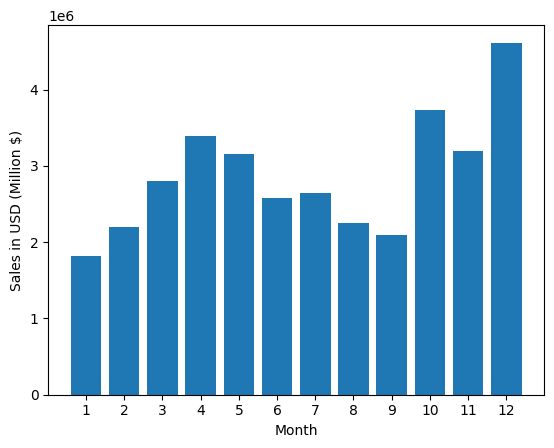

In [58]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD (Million $)")
plt.xlabel("Month")
plt.show()

December was the best month for sales. This is explained through Christmas shopping.

### 2. What city sold the most product?


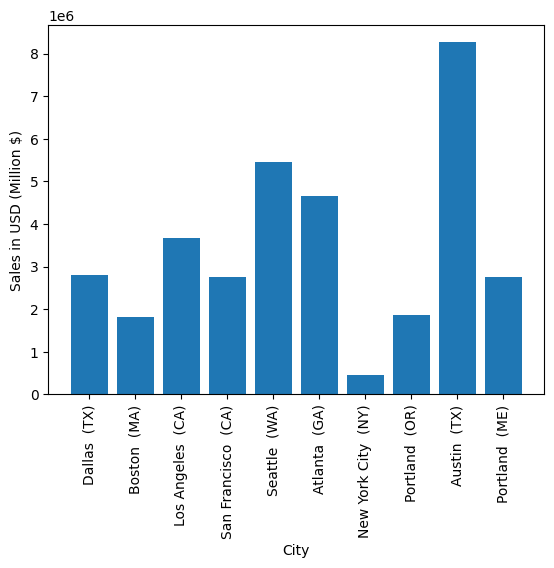

In [59]:
city = all_data['City'].unique()
results = all_data.groupby('City').sum()

plt.bar(city, results['Sales'])

plt.xticks(city, rotation = 'vertical')
plt.ylabel("Sales in USD (Million $)")
plt.xlabel("City")
plt.show()

Austin, Texas sold the most product.

### 3. What time should we display advertisements to maximize likelihood of customer's buying product?


#### Convert Order Date to datetime

In [60]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) 

C:\Users\marco\AppData\Local\Temp\ipykernel_15388\2176278637.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


#### Add Hour Column

In [61]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Count'] = 1

#### Plot Hourly Sale Count

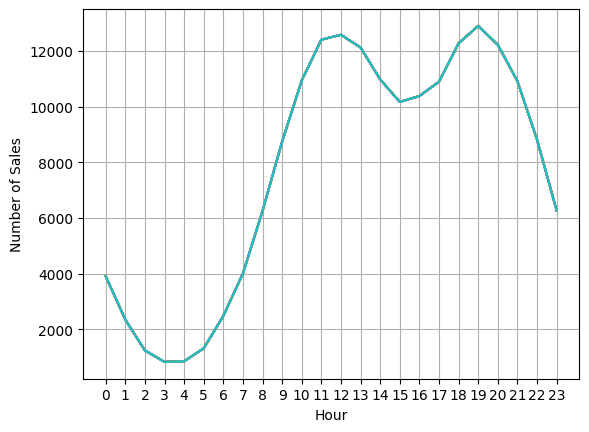

In [62]:
hours = [hour for hour, df in all_data.groupby('Hour')]
         
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.ylabel("Number of Sales")
plt.xlabel("Hour")
plt.show()

Highest Sales occur from 10am to 9pm. Within this timeframe, sales peak at 12pm and 7pm while it dips around 3-5pm. The peaks could be explained through lunch breaks at 12pm and customers arriving after work. I suggest advertisements before 11am or after 7pm, specifically when sales are not at peaks.

### 4. What products are most often sold together?


My first step is to identify which items are sold together, this would be indicated through products sold with the same Order ID.

In [63]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] #Keeps duplicates only

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #Groups products sold by Order ID

df = df[['Order ID', 'Grouped']].drop_duplicates() #Drop duplicated rows

C:\Users\marco\AppData\Local\Temp\ipykernel_15388\1091021642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #Groups products sold by Order ID


In [100]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) #Counts the occurances for pairs
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

Phones and phone accessories sold the most. It would be ideal to offer customers deals on accessories to compliment their phone purchase.

### 5. What product sold the most? Why do you think it sold the most?

In [77]:
#all_data = all_data.drop(['Order Date', 'Purchase Address', 'City'], axis=1)Purchase Address
product_group = all_data.groupby('Product') #Drop datetime
quantity_ordered = product_group.sum()['Quantity Ordered']

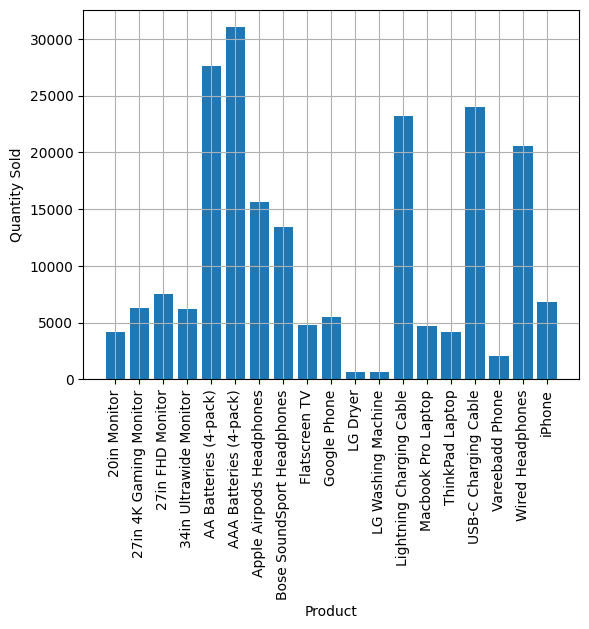

In [70]:
product = [product for product, df in product_group]
         
plt.bar(product, quantity_ordered)
plt.xticks(product, rotation = 'vertical')
plt.grid()
plt.ylabel("Quantity Sold")
plt.xlabel("Product")
plt.show()

AAA Batteries (4-pack) sold the most, comparably to AA Batteries (4-pack). Fairly reasonable because the products are cheap and require renewing purchases. I will further investigate the correlation between Quanity Sold and Price by overlapping the Price on the plot.


In [79]:
all_data.head()
price = all_data.groupby('Product').mean()['Price Each']

C:\Users\marco\AppData\Local\Temp\ipykernel_15388\2269099167.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical', size=8)


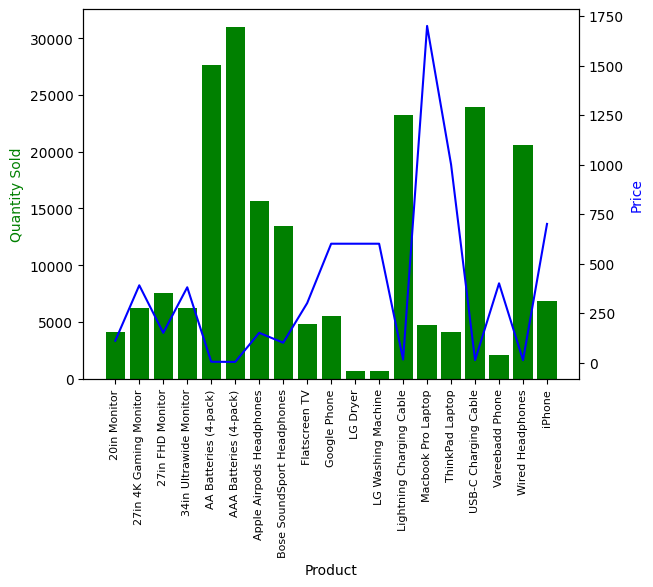

In [98]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered, color='g')
ax2.plot(product, price, color='b')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Sold', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(product, rotation='vertical', size=8)

plt.show()

The hypothesis is supported by the plot. Other things to note, the expensive LG Dryer explains the low quantity sold. But the correlation doesn't follow for Macbook Pro. We see far more sales on laptops than dryer/washer even though the laptop costs 2.5 times more.